In [1]:
%matplotlib inline

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from mpdaf.obj import Cube, Image

In [2]:
cd ~/dev/mpdaf/

/home/simon/dev/mpdaf


In [3]:
c = Cube('data/sdetect/minicube.fits')
im = Image('../a478hst.fits')

In [4]:
center_pix = (20,20)
center_sky = c.wcs.pix2sky((20,20))[0]
center_sky

array([ 10.4656934 ,  63.35563325])

In [5]:
size_arcsec = 60
size_pix_muse = 60 / c.wcs.get_step(unit=u.arcsec)
size_pix_hst = 60 / im.wcs.get_step(unit=u.arcsec)

size_pix_muse, size_pix_hst

(array([ 300.,  300.]), array([ 600.,  600.]))

### Mpdaf

In [6]:
sub = im.subimage(center_sky, size_arcsec)
sub.write('subimage.fits', savemask='nan')

In [7]:
sub.wcs.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =   420.82673331428953 / Pixel coordinate of reference point            
CRPIX2  =   397.80738948441308 / Pixel coordinate of reference point            
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =   63.351490348161327 / [deg] Coordinate value at reference point      
CRVAL2  =    10.46432703958695 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =    10.46432703958695 / [deg] Native latitude of celestial pole        
RADESYS = 'ICRS'               / Equatorial coordinate system                   
CD1_1   = -1.4989202262336E-

### Astropy

In [8]:
new_center_pix = im.wcs.sky2pix(c.wcs.pix2sky((20,20)), nearest=True)[0]
new_center_pix

array([650, 636])

In [9]:
radius = int(np.rint(size_pix_hst[0] / 2.))
radius

300

In [10]:
origin = new_center_pix[0] - radius, new_center_pix[1] - radius
origin

(350, 336)

In [11]:
hdulist = fits.open('../a478hst.fits')
for i, hdu in enumerate(hdulist[1:], 1):
     hdulist[i].data = hdu.data[new_center_pix[0]-radius:new_center_pix[0]+radius,
                                new_center_pix[1]-radius:new_center_pix[1]+radius]
     hdu.header['CRPIX1'] -= origin[1]
     hdu.header['CRPIX2'] -= origin[0]
hdulist.writeto('cutout.fits', clobber=True)

In [12]:
hdulist[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  600                                                  
NAXIS2  =                  600                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'SCI     '           / Extension name                                 
EXTVER  =                    1 / Extension version                              
INHERIT =                    T / Inherits global header                         
DATE    = '2009-01-09T17:08:15' / Date FITS file was generated                  
IRAF-TLM= '17:10:55 (09/01/2

### Difference

In [13]:
new = Image('cutout.fits')
sub = Image('subimage.fits')

#### One pixel offset on one axis

/home/simon/dev/astropy/astropy/visualization/mpl_normalize.py:76: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/home/simon/miniconda2/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


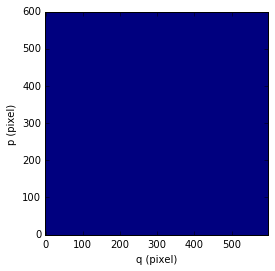

In [14]:
diff = sub[:, :-1] - new[:, 1:]
diff.plot(zscale=True)

In [15]:
from astropy.wcs import WCSHDO_P17

In [16]:
sub.wcs.wcs.printwcs()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 63.351490348161327  10.46432703958695  
CRPIX : 420.82673331428953  397.80738948441308  
CD1_1 CD1_2  : -1.4989202262336e-05  -2.3386507943905002e-05  
CD2_1 CD2_2  : -2.3386507943905002e-05  1.4989202262336699e-05  
NAXIS    : 600 600


In [17]:
new.wcs.wcs.printwcs()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 63.351490348161327  10.46432703958695  
CRPIX : 421.82673331428953  397.80738948441308  
CD1_1 CD1_2  : -1.4989202262336791e-05  -2.3386507943905669e-05  
CD2_1 CD2_2  : -2.3386507943905669e-05  1.4989202262336791e-05  
NAXIS    : 600 600


#### CRPIX1 is different, which explains the 1 pixel offset, fine. But CRVAL1/2 values also differs ...

In [18]:
new.wcs.wcs.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      421.82673331429 / Pixel coordinate of reference point            
CRPIX2  =      397.80738948441 / Pixel coordinate of reference point            
PC1_1   = -1.4989202262337E-05 / Coordinate transformation matrix element       
PC1_2   = -2.3386507943906E-05 / Coordinate transformation matrix element       
PC2_1   = -2.3386507943906E-05 / Coordinate transformation matrix element       
PC2_2   =  1.4989202262337E-05 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [19]:
sub.wcs.wcs.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      420.82673331429 / Pixel coordinate of reference point            
CRPIX2  =      397.80738948441 / Pixel coordinate of reference point            
PC1_1   = -1.4989202262336E-05 / Coordinate transformation matrix element       
PC1_2   = -2.3386507943905E-05 / Coordinate transformation matrix element       
PC2_1   = -2.3386507943905E-05 / Coordinate transformation matrix element       
PC2_2   =  1.4989202262337E-05 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [20]:
sub.wcs.wcs.to_header(relax=WCSHDO_P17)

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =   420.82673331428953 / Pixel coordinate of reference point            
CRPIX2  =   397.80738948441308 / Pixel coordinate of reference point            
PC1_1   = -1.4989202262336E-05 / Coordinate transformation matrix element       
PC1_2   = -2.3386507943905002E-05 / Coordinate transformation matrix element    
PC2_1   = -2.3386507943905002E-05 / Coordinate transformation matrix element    
PC2_2   =  1.4989202262336699E-05 / Coordinate transformation matrix element    
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [21]:
new.wcs.isEqual(sub.wcs)

True

In [22]:
new.wcs.pix2sky([0, 0])

array([[ 10.46822049,  63.36734198]])

In [23]:
sub.wcs.pix2sky([0, 0])

array([[ 10.4681971 ,  63.36732674]])

In [24]:
new.wcs.pix2sky([0, 0]) - sub.wcs.pix2sky([0, 0])

array([[  2.33857538e-05,   1.52441005e-05]])